# NumPy Exercise

This notebook demonstrates various exercises to practice and understand NumPy, a fundamental library for numerical computing in Python. It covers:

- Using `np.fromfunction` to generate arrays
- Alternative approaches using NumPy's broadcasting
- Additional exercises with NumPy (data buffers, reshaping, etc.)

In [13]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [14]:
# Define a custom function
def my_function_hyeri(n, x, y):
    """Calculate the product of (2x) and (3y) added to n."""
    return (2 * x) * (3 * y) + n

## 1. Using `np.fromfunction`

`np.fromfunction` is a NumPy function that constructs an array by executing a function over each coordinate. Here, we use it to generate a 3D array with specific values.

In [15]:
# Section 1: Using np.fromfunction

# Generate a 3D array using np.fromfunction
result_fromfunction = np.fromfunction(my_function_hyeri, (3, 2, 6), dtype=int)
print("Result using np.fromfunction:")
print(result_fromfunction)

Result using np.fromfunction:
[[[ 0  0  0  0  0  0]
  [ 0  6 12 18 24 30]]

 [[ 1  1  1  1  1  1]
  [ 1  7 13 19 25 31]]

 [[ 2  2  2  2  2  2]
  [ 2  8 14 20 26 32]]]


## 2. Alternative Approach to `np.fromfunction`

While `np.fromfunction` is useful, here is an alternative method using NumPy's broadcasting, which provides more control over the array creation process.

In [16]:
# Section 2: Alternative Approach to np.fromfunction

# Create x, y, and n indices using np.arange and reshaping for broadcasting
x_indices = np.arange(2).reshape(1, 2, 1)  # Reshape for broadcasting
y_indices = np.arange(6).reshape(1, 1, 6)  # Reshape for broadcasting
n_indices = np.arange(3).reshape(3, 1, 1)  # Reshape for broadcasting

# Apply the function using broadcasting
result_alternative = my_function_hyeri(n_indices, x_indices, y_indices)
print("Result using alternative broadcasting approach:")
print(result_alternative)

Result using alternative broadcasting approach:
[[[ 0  0  0  0  0  0]
  [ 0  6 12 18 24 30]]

 [[ 1  1  1  1  1  1]
  [ 1  7 13 19 25 31]]

 [[ 2  2  2  2  2  2]
  [ 2  8 14 20 26 32]]]


## 3. Data Buffer Example

In this section, we change the type of an array and explore the effect on its data representation in memory.

In [17]:
# Data buffer example with type change
# Define an array with int32 (4 bytes) and convert it to int16 (2 bytes)
hyeri = np.array([[1, 2], [1000, 2000]], dtype=np.int32)

In [18]:
# Convert data to bytes format and display
data_bytes = hyeri.data.tobytes()
print(data_bytes)

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'


In [19]:
# Change the array type to int16 and convert to bytes format again
hyeri = np.array([[1, 2], [1000, 2000]], dtype=np.int16)
data_bytes = hyeri.data.tobytes()
print(data_bytes)

b'\x01\x00\x02\x00\xe8\x03\xd0\x07'


## 4. Reshape and Upcasting Examples

These examples demonstrate how to reshape arrays and change their data types in NumPy.

In [20]:
# Reshape example
g = np.arange(24)  # Create a 1D array with values from 0 to 23
print(g)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [21]:
# Reshape to multiple formats
g.shape = (6, 4)
print(g)
g.shape = (2, 3, 4)
print(g)
g2 = g.reshape(4, 6)
g2[1, 2] = 999  # Modify the reshaped array
print(g2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[  0   1   2   3   4   5]
 [  6   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


In [22]:
# Reshape the array to 2 by 12 for g_Hyeri
g_hyeri = g.reshape(2, 12)
print(g_hyeri)

[[  0   1   2   3   4   5   6   7 999   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22  23]]


In [23]:
# Upcasting example
k1 = np.arange(0, 5, dtype=np.int32)  # Array with int32 type
print(k1)

k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)  # Add int8 array to int32 array
print(k2.dtype, k2)

k3 = k1 + 1.5  # Adding float to int array promotes to float
print(k3.dtype, k3)

[0 1 2 3 4]
int32 [ 5  7  9 11 13]
float64 [1.5 2.5 3.5 4.5 5.5]


## 5. Conditional Operators and Summing Across Axes

Learn how to use conditional operators for element-wise comparisons and how to sum across different axes in a NumPy array.

In [24]:
# Conditional operators example
m = np.array([20, -5, 30, 40])
result = m < 35  # Check which elements are less than 35
print(result)
print(m[m < 35])  # Elements less than 35

[ True  True  True False]
[20 -5 30]


In [25]:
# Sum across axis example
c = np.arange(24).reshape(2, 3, 4)  # Create a 3D array
c_sum_axis2 = c.sum(axis=2)  # Sum across columns
print(c_sum_axis2)

[[ 6 22 38]
 [54 70 86]]


## 6. Binary Universal Functions (ufuncs)

Binary ufuncs perform element-wise operations on arrays. Here, we use `np.copysign` to change the signs of array elements.

In [26]:
# Binary ufuncs example
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
copysign_result = np.copysign(b, a)  # Change the sign of 'b' to match 'a'
print(copysign_result)

copysign_result_reverse = np.copysign(a, b)  # Change the sign of 'a' to match 'b'
print(copysign_result_reverse)

[ 2. -8.  1.  7.]
[ 1.  2. -3.  4.]


## 7. Differences with Regular Python Arrays

This section illustrates the differences between NumPy arrays and regular Python lists, particularly how slices work in NumPy.

In [27]:
# Differences with regular Python arrays example
a = np.array([1, 5, 3, 19, 13, 7, 3])
a_slice = a[2:6]
a_slice[1] = 1000  # Modify slice, which changes the original array
print(a)

[   1    5    3 1000   13    7    3]


## 8. Multi-dimensional Arrays and Boolean Indexing

Learn how to manipulate and access data in multi-dimensional arrays and use Boolean indexing for advanced data selection.

In [28]:
# Multi-dimensional array example
b = np.arange(48).reshape(4, 12)  # Create a 2D array
b_values = b[1, 4:7]  # Extract values 16, 17, 18
print(b_values)

[16 17 18]


In [29]:
# Boolean indexing example
cols_on2_hyeri = np.array([True] + [False] * 10 + [True])
first_and_last_columns = b[:, cols_on2_hyeri]  # Extract first and last columns
print(first_and_last_columns)

[[ 0 11]
 [12 23]
 [24 35]
 [36 47]]


## 9. Iterating Over Elements to Find Zeros

This section shows how to iterate over array elements and check for zeros.

In [30]:
# Iterating over elements to find zeros
c = np.arange(24).reshape(2, 3, 4)
def check_zero(array):
    """Check for zero elements in the array and print their status."""
    for index, value in enumerate(array.flat):
        print(f"element{index + 1:02d}: {value != 0}")

check_zero(c)  # Function to check for zero values

element01: False
element02: True
element03: True
element04: True
element05: True
element06: True
element07: True
element08: True
element09: True
element10: True
element11: True
element12: True
element13: True
element14: True
element15: True
element16: True
element17: True
element18: True
element19: True
element20: True
element21: True
element22: True
element23: True
element24: True


## 10. Vertically Stacking and Concatenating Arrays

This section demonstrates how to stack multiple arrays vertically using `np.vstack` and concatenate arrays using `np.concatenate`.

In [31]:
# Vertically stack arrays
q1 = np.full((3, 4), 1.0)
q2 = np.full((4, 4), 2.0)
q5_hyeri = np.vstack((q1, q2))
print(q5_hyeri)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]


In [32]:
# Concatenate arrays example
q3 = np.full((3, 4), 3.0)
q8_hyeri = np.concatenate((q1, q3), axis=0)
print(q8_hyeri)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


## 11. Transpose of Arrays

The transpose operation flips a matrix over its diagonal. Here, we demonstrate how to transpose a matrix using NumPy.

In [33]:
# Transpose example
t_hyeri = np.zeros((2, 7), dtype=int)  # Creating an ndarray of zeros
print(t_hyeri)

t_hyeri_transposed = t_hyeri.transpose()
print(t_hyeri_transposed)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## 12. Matrix Multiplication and Inversion

This section covers matrix multiplication using the dot product and calculating the pseudo-inverse of a matrix using NumPy.

In [34]:
# Matrix multiplication example
a1 = np.arange(8).reshape(2, 4)
a2 = np.arange(8).reshape(4, 2)
a3 = np.dot(a1, a2)
print(a3)
print(a3.shape)

[[28 34]
 [76 98]]
(2, 2)


In [35]:
# Matrix inverse and pseudo-inverse example
hyeri = np.arange(16).reshape(4, 4)
hyeri_pinv = linalg.pinv(hyeri)
print(hyeri)
print(hyeri_pinv)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[-2.62500000e-01 -1.37500000e-01 -1.25000000e-02  1.12500000e-01]
 [-1.00000000e-01 -5.00000000e-02  7.80625564e-18  5.00000000e-02]
 [ 6.25000000e-02  3.75000000e-02  1.25000000e-02 -1.25000000e-02]
 [ 2.25000000e-01  1.25000000e-01  2.50000000e-02 -7.50000000e-02]]


## 13. Identity Matrix and Determinant Calculation

Learn how to create an identity matrix using `np.eye` and compute the determinant of a random matrix.

In [36]:
# Identity matrix example
identity_matrix = np.eye(5)
print(identity_matrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [37]:
# Determinant example
random_arr = np.random.rand(3, 3)
determinant = linalg.det(random_arr)
print(determinant)

0.07476387527585165


## 14. Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are fundamental in linear algebra. Here, we compute them for a random 4x4 matrix.

In [38]:
# Eigenvalues and eigenvectors example
e_hyeri = np.random.rand(4, 4)
eigenvalues, eigenvectors = linalg.eig(e_hyeri)
print(eigenvalues)
print(eigenvectors)

[ 1.74724007  0.44943538  0.25208839 -0.05297005]
[[-0.48564015 -0.94052566 -0.80482912  0.44210473]
 [-0.68596286  0.05856181 -0.29605082  0.21248326]
 [-0.41210224  0.23132677  0.36053355 -0.86313677]
 [-0.35182431  0.24180556  0.3669054  -0.11995496]]


## 15. Solving a System of Linear Equations

Use NumPy to solve a system of linear equations and verify the solution using the `allclose` method.

In [39]:
# Solving a system of linear scalar equations example
coeffs = np.array([[2, 4, 1], [3, 8, 2], [1, 2, 3]])
depvars = np.array([8, 16, -2])
solution = linalg.solve(coeffs, depvars)
print(solution)
print(np.allclose(coeffs.dot(solution), depvars))  # Check the solution

[ 0.   2.6 -2.4]
True


## 16. Visualization with Matplotlib

This section demonstrates how to create a cosine plot using NumPy for data creation and Matplotlib for visualization.

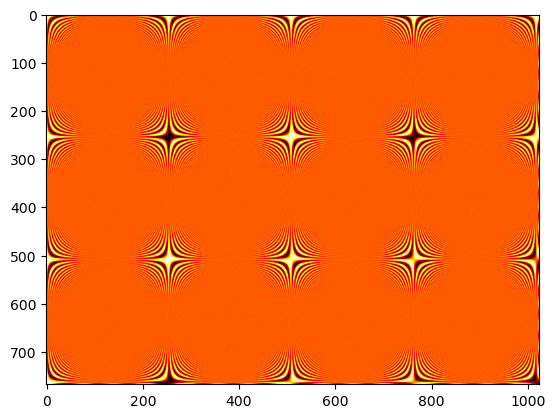

In [40]:
# Cosine graph example
x_coords = np.arange(0, 1024)
y_coords = np.arange(0, 768)
X, Y = np.meshgrid(x_coords, y_coords)
data1 = np.cos(X * Y / 40.5)
plt.imshow(data1, cmap=cm.hot, interpolation="bicubic")
plt.show()

## 17. Saving and Loading Data with NumPy

Learn how to save an array to a CSV file and load it back using NumPy.

In [41]:
# Text format example
sav_hyeri = np.random.rand(4, 4)
np.savetxt("Hyeri_sav.csv", sav_hyeri, delimiter=",")
load_hyeri = np.loadtxt("Hyeri_sav.csv", delimiter=",")
print(load_hyeri)

[[0.25958666 0.3874969  0.04905681 0.64223397]
 [0.43649222 0.08254916 0.16227417 0.40444379]
 [0.80409716 0.24402689 0.94692806 0.29613587]
 [0.60851873 0.33168806 0.54741012 0.10218835]]
